# FINAL PROJECT PRESENTATION - CORONA VIRUS DATASET
# GROUP MEMBERS

# Praneshwar Govind Srinivasan
# Mudit Bisht

In [139]:
# Importing Necessary libraries

In [140]:
# Libraries for handling dataframes
import numpy as ny
import pandas as pd

In [141]:
# library for math functions
import math

In [142]:
# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
# Library for web scraping
import urllib 

In [165]:
# Library for regression analysis
import statsmodels.api as sm

In [144]:
# Reading the structured dataset into a panda dataframe
C19_df = pd.read_csv("COVID_19.csv")

In [145]:
# Inspecting the dataset
C19_df.info()
C19_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 7 columns):
Province/State    1418 non-null object
Country/Region    1872 non-null object
Last Update       1872 non-null object
Confirmed         1846 non-null float64
Suspected         85 non-null float64
Recovered         1690 non-null float64
Death             1690 non-null float64
dtypes: float64(4), object(3)
memory usage: 102.5+ KB


Province/State     object
Country/Region     object
Last Update        object
Confirmed         float64
Suspected         float64
Recovered         float64
Death             float64
dtype: object

In [146]:
# Column 'suspected' has about 95% null values and is also not insightful for our analysis.
# Therefore we have decided to drop it from the dataframe
C19_df = C19_df.drop(columns = ['Suspected'])
# Renaming the column names in "C19_df" for better usability
C19_df = C19_df.rename(columns = {"Country/Region":"Country","Province/State":"State"})

In [147]:
# We found that there was a typing error in the corona dataset for the columns "Country" and "State"
# Fixing the typo 'Macau' to 'Macao'
C19_df['Country'][C19_df['Country'] == 'Macau'] = 'Macao'
C19_df['State'][C19_df['State'] == 'Macau'] = 'Macao'

E:\Study\UDEMY\RESOURCES\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Study\UDEMY\RESOURCES\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [148]:
# Calculating the percentage of null values for each country to determine reliability of the data in a new dataframe "percent_null_mod"
percent_null_mod = C19_df.groupby('Country',as_index=False).size().to_frame('Total') 
percent_null_mod['Death%'] = 0 # to store the null values in "Death Column"
percent_null_mod['Recovered%'] = 0 # to store the null values in "Recovery Column"

In [149]:
# Using a for loop to iterate through the dataset and compute null values
for ctr in range(0,C19_df.shape[0]):
    if math.isnan(C19_df['Death'][ctr]): # Checking for null values
        percent_null_mod.loc[C19_df['Country'][ctr]]['Death%'] += 1 # incrementing the null count
    if math.isnan(C19_df['Recovered'][ctr]): # Checking for null values
        percent_null_mod.loc[C19_df['Country'][ctr]]['Recovered%'] += 1 # incrementing the null count
# Calculating the null percentage for each country
percent_null_mod['Death%'] = percent_null_mod['Death%']/percent_null_mod['Total']
percent_null_mod['Recovered%'] = percent_null_mod['Recovered%']/percent_null_mod['Total']

In [150]:
# Viewing the data to check for percent of null values.
percent_null_mod

,Total,Death%,Recovered%
Country,,,
Australia,81,0.135802,0.135802
Belgium,3,0.000000,0.000000
Cambodia,24,0.208333,0.208333
Canada,50,0.160000,0.160000
China,1028,0.046693,0.046693
Finland,17,0.176471,0.176471
France,30,0.233333,0.233333
Germany,22,0.181818,0.181818
Hong Kong,34,0.147059,0.147059


In [151]:
# From the dataframe 'percent_null' we drop the countries "Sweden" and "Philippines" as they have a high null percentage and low total occurences
C19_df.drop(C19_df[(C19_df['Country'] == 'Sweden') | (C19_df['Country'] == 'Philippines')].index.values,inplace=True)

In [153]:
# Seperating the time from the date as we want to do a daily time-series and be able to compare the results between countries 
C19_df['Last Update'] = C19_df['Last Update'].str.split(' ').str[0]

In [154]:
# Importing the semi-structured dataset containing country data using Web Scraping
# Reading the html data
link = "https://www.worldometers.info/world-population/population-by-country/"
req = urllib.request.Request(link, headers={'User-Agent': 'Mozilla/5.0'})
html = urllib.request.urlopen(req).read()
# reading the html data into a panda dataframe "country_df"
html_data = pd.read_html(html)
country_df = html_data[0]
country_df

In [156]:
# We notice that an additional column with index values is present in the data and thus we remove this data 
country_df = country_df.drop(columns = "#")
# Renaming the columns in the dataframe for better usability
country_df = country_df.rename(columns = {"Country (or dependency)":"Country","Population (2020)":"Population"})

In [157]:
# Subsetting the data to contain only the data for the countries present in the corona virus dataset
country_df = country_df[country_df.Country.isin(C19_df['Country'])]
# Sorting the dataframe and resetting the index 
country_df = country_df.sort_values('Country')
country_df.index = range(0,country_df.shape[0])
country_df

,Country,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Australia,25499884,1.18 %,296686,3,7682300,158246.0,1.8,38,86 %,0.33 %
1,Belgium,11589623,0.44 %,50295,383,30280,48000.0,1.7,42,98 %,0.15 %
2,Cambodia,16718965,1.41 %,232423,95,176520,-30000.0,2.5,26,24 %,0.21 %
3,Canada,37742154,0.89 %,331107,4,9093510,242032.0,1.5,41,81 %,0.48 %
4,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
5,Finland,5540720,0.15 %,8564,18,303890,14000.0,1.5,43,86 %,0.07 %
6,France,65273511,0.22 %,143783,119,547557,36527.0,1.9,42,82 %,0.84 %
7,Germany,83783942,0.32 %,266897,240,348560,543822.0,1.6,46,76 %,1.07 %
8,Hong Kong,7496981,0.82 %,60827,7140,1050,29308.0,1.3,45,N.A.,0.10 %
9,India,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %


In [158]:
country_df.dtypes

Country             object
Population           int64
Yearly Change       object
Net Change           int64
Density (P/Km²)      int64
Land Area (Km²)      int64
Migrants (net)     float64
Fert. Rate          object
Med. Age            object
Urban Pop %         object
World Share         object
dtype: object

In [159]:
# Fixing NA's and type for the "Urban Pop %" column
# Setting the string 'N.A.' to None
country_df['Urban Pop %'][country_df[country_df['Urban Pop %'] == 'N.A.'].index] = None
# Type casting the column to 'float64'
country_df['Urban Pop %'] = country_df['Urban Pop %'].str.split('%').str[0].astype('float64')
# Replacing the None values with the mean value of the column
country_df = country_df.fillna(country_df.mean())
country_df

E:\Study\UDEMY\RESOURCES\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Australia,25499884,1.18 %,296686,3,7682300,158246.0,1.8,38,86.000000,0.33 %
1,Belgium,11589623,0.44 %,50295,383,30280,48000.0,1.7,42,98.000000,0.15 %
2,Cambodia,16718965,1.41 %,232423,95,176520,-30000.0,2.5,26,24.000000,0.21 %
3,Canada,37742154,0.89 %,331107,4,9093510,242032.0,1.5,41,81.000000,0.48 %
4,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61.000000,18.47 %
5,Finland,5540720,0.15 %,8564,18,303890,14000.0,1.5,43,86.000000,0.07 %
6,France,65273511,0.22 %,143783,119,547557,36527.0,1.9,42,82.000000,0.84 %
7,Germany,83783942,0.32 %,266897,240,348560,543822.0,1.6,46,76.000000,1.07 %
8,Hong Kong,7496981,0.82 %,60827,7140,1050,29308.0,1.3,45,67.956522,0.10 %
9,India,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35.000000,17.70 %


In [160]:
# Fixing the data and type for the 'Yearly Change' and 'World Share' column
# Splitting the '%' from the string and type casting it to float64 type
country_df['Yearly Change'] = country_df['Yearly Change'].str.split('%').str[0].astype('float64')
country_df['World Share'] = country_df['World Share'].str.split('%').str[0].astype('float64')

In [161]:
# Fixing the data type for the 'Fert. Rate' and 'Med. Age' 
country_df['Fert. Rate'] = country_df['Fert. Rate'].astype('float64')
country_df['Med. Age'] = country_df['Med. Age'].astype('float64')

In [162]:
# Combining the values in the corona virus dataset by grouping on "Country" to be able to merge the 2 datasets 
combined_C19 = C19_df.groupby('Country',as_index=False).sum()
combined_C19

,Country,Confirmed,Recovered,Death
0,Australia,238.0,55.0,22.0
1,Belgium,3.0,0.0,0.0
2,Cambodia,24.0,6.0,2.0
3,Canada,76.0,10.0,7.0
4,China,302231.0,15281.0,20132.0
5,Finland,17.0,2.0,0.0
6,France,138.0,29.0,4.0
7,Germany,158.0,13.0,11.0
8,Hong Kong,337.0,64.0,37.0
9,India,29.0,3.0,0.0


In [163]:
# Merging the corona virus and country dataset by "Country" for analysis
merged_df = pd.merge(combined_C19,country_df,on = "Country")
# Constructing 2 new columns to calculate Death ratio and Recovered Ratio for analysis 
merged_df['Death_ratio'] = merged_df['Death']/merged_df['Confirmed']
merged_df['Recovered_ratio'] = merged_df['Recovered']/merged_df['Confirmed']
merged_df

,Country,Confirmed,Recovered,Death,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Death_ratio,Recovered_ratio
0,Australia,238.0,55.0,22.0,25499884,1.18,296686,3,7682300,158246.0,1.8,38.0,86.000000,0.33,0.092437,0.231092
1,Belgium,3.0,0.0,0.0,11589623,0.44,50295,383,30280,48000.0,1.7,42.0,98.000000,0.15,0.000000,0.000000
2,Cambodia,24.0,6.0,2.0,16718965,1.41,232423,95,176520,-30000.0,2.5,26.0,24.000000,0.21,0.083333,0.250000
3,Canada,76.0,10.0,7.0,37742154,0.89,331107,4,9093510,242032.0,1.5,41.0,81.000000,0.48,0.092105,0.131579
4,China,302231.0,15281.0,20132.0,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38.0,61.000000,18.47,0.066611,0.050561
5,Finland,17.0,2.0,0.0,5540720,0.15,8564,18,303890,14000.0,1.5,43.0,86.000000,0.07,0.000000,0.117647
6,France,138.0,29.0,4.0,65273511,0.22,143783,119,547557,36527.0,1.9,42.0,82.000000,0.84,0.028986,0.210145
7,Germany,158.0,13.0,11.0,83783942,0.32,266897,240,348560,543822.0,1.6,46.0,76.000000,1.07,0.069620,0.082278
8,Hong Kong,337.0,64.0,37.0,7496981,0.82,60827,7140,1050,29308.0,1.3,45.0,67.956522,0.10,0.109792,0.189911
9,India,29.0,3.0,0.0,1380004385,0.99,13586631,464,2973190,-532687.0,2.2,28.0,35.000000,17.70,0.000000,0.103448


In [164]:
merged_df.dtypes

Country             object
Confirmed          float64
Recovered          float64
Death              float64
Population           int64
Yearly Change      float64
Net Change           int64
Density (P/Km²)      int64
Land Area (Km²)      int64
Migrants (net)     float64
Fert. Rate         float64
Med. Age           float64
Urban Pop %        float64
World Share        float64
Death_ratio        float64
Recovered_ratio    float64
dtype: object

# Analysis 1 – How each country’s population and urban population affects the confirmed cases to death ratio and confirmed cases to recovery ratio

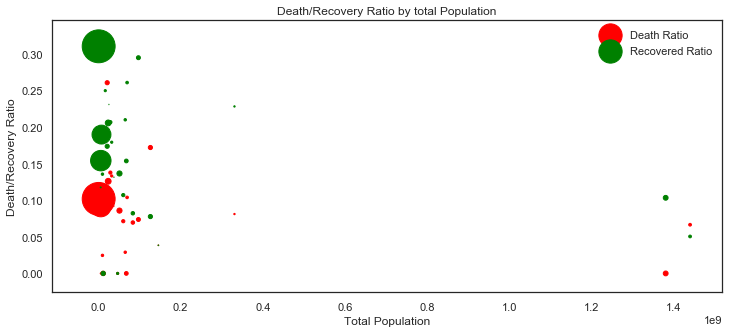

In [176]:
# Plotting how "POPULATION" affects "Death_ratio" and "Recovered_ratio"
# Setting the plot elements to plot the data
plt.figure(figsize = (12,5))
plt.style.use('seaborn-ticks')
plt.title("Death/Recovery Ratio by total Population") 
plt.xlabel("Total Population") 
plt.ylabel("Death/Recovery Ratio")

# Generating a scatter plot to visualize how "Death_ratio" and "Recovery_ratio" change with "Population" 
# and the size of the scatter point depicts the "Population Density" of the country
plt.scatter(merged_df["Population"], merged_df["Death_ratio"],s=merged_df["Density (P/Km²)"]/20,color = 'red',marker = 'o', label = 'Death Ratio')
plt.scatter(merged_df["Population"], merged_df["Recovered_ratio"],s=merged_df["Density (P/Km²)"]/20,color = 'green',marker = 'o', label = 'Recovered Ratio')

# To show the grapgh and legend
plt.legend()
plt.show()

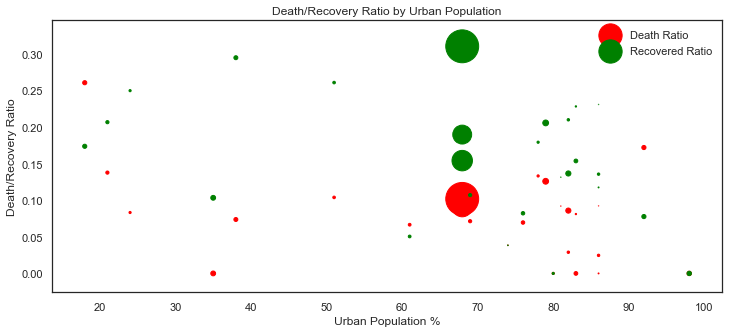

In [177]:
# Plotting how "URBAN POPULATION %" affects "Death_ratio" and "Recovered_ratio"
# Setting the plot elements to plot the data
plt.figure(figsize = (12,5))
plt.style.use('seaborn-ticks')
plt.title("Death/Recovery Ratio by Urban Population") 
plt.xlabel("Urban Population %") 
plt.ylabel("Death/Recovery Ratio")

# Generating a scatter plot to visualize how "Death_ratio" and "Recovery_ratio" change with "Urban Population %" 
# and the size of the scatter point depicts the "Population Density" of the country
plt.scatter(merged_df["Urban Pop %"], merged_df["Death_ratio"],s=merged_df["Density (P/Km²)"]/20,color = 'red',marker = 'o', label = 'Death Ratio')
plt.scatter(merged_df["Urban Pop %"], merged_df["Recovered_ratio"],s=merged_df["Density (P/Km²)"]/20,color = 'green',marker = 'o', label = 'Recovered Ratio')

# To show the grapgh and legend
plt.legend()
plt.show()

# Analysis 2 – Finding Factors that influence the corona virus spread in the world and how we can use these factors for prediction

In [34]:
# Here we use a Forward selection Stepwise regression approach to determine the best model for our data to help with prediction

In [178]:
# Detecting how the number of "Confirmed" cases are explained by the "population" attribute
# population
dep_var = merged_df['Confirmed']
ind_var = merged_df['Population']
ind_var = sm.add_constant(ind_var)

model = sm.OLS(dep_var, ind_var).fit()
model.summary()
# R-Squared - 0.465
# Included in the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     22.72
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           7.52e-05
Time:                        15:06:10   Log-Likelihood:                -313.45
No. Observations:                  26   AIC:                             630.9
Df Residuals:                      24   BIC:                             633.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6065.4988   9286.226     -0.653      0.520   -2.52e+04    1.31e+04
Population     0.0001   2.32e-05      4.766      0.000    6.27e-05       0.000
==============================================================================
Omnibus:                       17.031   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.437
Skew:                           0.079   Prob(JB):                     8.47e-21
Kurtosis:                      12.236   Cond. No.                     4.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
# Detecting how the number of "Confirmed" cases are explained by the "population" and 'land area' attribute
# population + land area
dep_var = merged_df['Confirmed']
ind_var = merged_df[['Population','Land Area (Km²)']]
ind_var = sm.add_constant(ind_var)

model = sm.OLS(dep_var, ind_var).fit()
model.summary()
# Adjusted R-Square - 0.452
# Excluded from the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     11.29
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           0.000384
Time:                        15:07:42   Log-Likelihood:                -313.22
No. Observations:                  26   AIC:                             632.4
Df Residuals:                      23   BIC:                             636.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -8346.5812      1e+04     -0.831      0.414   -2.91e+04    1.24e+04
Population          0.0001   2.51e-05      4.165      0.000    5.27e-05       0.000
Land Area (Km²)     0.0014      0.002      0.645      0.525      -0.003       0.006
==============================================================================
Omnibus:                       16.023   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.830
Skew:                           0.161   Prob(JB):                     5.63e-17
Kurtosis:                      11.305   Cond. No.                     4.67e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [180]:
# Detecting how the number of "Confirmed" cases are explained by the "population" and "Med. Age"  attribute
# population + Median Age
dep_var = merged_df['Confirmed']
ind_var = merged_df[['Population','Med. Age']]
ind_var = sm.add_constant(ind_var)

model = sm.OLS(dep_var, ind_var).fit()
model.summary()
# Adjusted R-Square - 0.465
# Included in model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     11.86
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           0.000288
Time:                        15:09:10   Log-Likelihood:                -312.89
No. Observations:                  26   AIC:                             631.8
Df Residuals:                      23   BIC:                             635.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.107e+04   5.56e+04     -1.098      0.284   -1.76e+05     5.4e+04
Population     0.0001   2.39e-05      4.868      0.000    6.69e-05       0.000
Med. Age    1394.9698   1391.237      1.003      0.326   -1483.024    4272.964
==============================================================================
Omnibus:                       15.557   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.719
Skew:                           0.148   Prob(JB):                     1.20e-15
Kurtosis:                      10.959   Cond. No.                     2.62e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [181]:
# Detecting how the number of "Confirmed" cases are explained by the "population",'Urban Pop %' and "Med. Age"  attribute
# population + Median Age + Urban Pop
dep_var = merged_df['Confirmed']
ind_var = merged_df[['Population','Med. Age','Urban Pop %']]
ind_var = sm.add_constant(ind_var)

model = sm.OLS(dep_var, ind_var).fit()
model.summary()
# Adjusted R-square - 0.441
# Excluded from the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     7.565
Date:                Tue, 28 Apr 2020   Prob (F-statistic):            0.00118
Time:                        15:10:03   Log-Likelihood:                -312.89
No. Observations:                  26   AIC:                             633.8
Df Residuals:                      22   BIC:                             638.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.125e+04   5.84e+04     -1.049      0.306   -1.82e+05    5.98e+04
Population      0.0001   2.45e-05      4.743      0.000    6.54e-05       0.000
Med. Age     1412.5279   1924.933      0.734      0.471   -2579.538    5404.594
Urban Pop %    -7.3361    541.851     -0.014      0.989   -1131.066    1116.394
==============================================================================
Omnibus:                       15.559   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.760
Skew:                           0.148   Prob(JB):                     1.17e-15
Kurtosis:                      10.961   Cond. No.                     2.69e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [182]:
# Detecting how the number of "Confirmed" cases are explained by the "population",'Migrants (net)' and "Med. Age"  attribute
# population + Median Age + Migrants
dep_var = merged_df['Confirmed']
ind_var = merged_df[['Population','Med. Age','Migrants (net)']]
ind_var = sm.add_constant(ind_var)

model = sm.OLS(dep_var, ind_var).fit()
model.summary()
# Adjusted R-Square - 0.444
# Excluded from the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     7.647
Date:                Tue, 28 Apr 2020   Prob (F-statistic):            0.00111
Time:                        15:19:54   Log-Likelihood:                -312.82
No. Observations:                  26   AIC:                             633.6
Df Residuals:                      22   BIC:                             638.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -6.42e+04   5.74e+04     -1.118      0.276   -1.83e+05    5.49e+04
Population         0.0001   2.66e-05      4.224      0.000    5.73e-05       0.000
Med. Age        1516.2929   1461.026      1.038      0.311   -1513.690    4546.276
Migrants (net)    -0.0135      0.039     -0.347      0.732      -0.094       0.067
==============================================================================
Omnibus:                       15.868   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.467
Skew:                           0.059   Prob(JB):                     6.76e-17
Kurtosis:                      11.290   Cond. No.                     2.65e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [183]:
# Detecting how the number of "Confirmed" cases are explained by the "population",'Density (P/Km²)' and "Med. Age"  attribute
# population + Median Age + Density
dep_var = merged_df['Confirmed']
ind_var = merged_df[['Population','Med. Age','Density (P/Km²)']]
ind_var = sm.add_constant(ind_var)

model = sm.OLS(dep_var, ind_var).fit()
model.summary()
# Adjusted R-Square - 0.441
# Excluded from the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     7.572
Date:                Tue, 28 Apr 2020   Prob (F-statistic):            0.00117
Time:                        15:19:59   Log-Likelihood:                -312.89
No. Observations:                  26   AIC:                             633.8
Df Residuals:                      22   BIC:                             638.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6.101e+04   5.69e+04     -1.073      0.295   -1.79e+05    5.69e+04
Population          0.0001   2.46e-05      4.745      0.000    6.56e-05       0.000
Med. Age         1383.7875   1426.277      0.970      0.342   -1574.130    4341.705
Density (P/Km²)     0.2023      1.959      0.103      0.919      -3.860       4.265
==============================================================================
Omnibus:                       15.585   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.276
Skew:                           0.140   Prob(JB):                     9.06e-16
Kurtosis:                      10.992   Cond. No.                     2.62e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [184]:
# Detecting how the number of "Confirmed" cases are explained by the "population",'Yearly Change' and "Med. Age"  attribute
# population + Median Age  + Yearly Change
dep_var = merged_df['Confirmed']
ind_var = merged_df[['Population','Med. Age','Yearly Change']]
ind_var = sm.add_constant(ind_var)

model = sm.OLS(dep_var, ind_var).fit()
model.summary()
# Adjusted R-Square - 0.448
# Excluded from the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     7.754
Date:                Tue, 28 Apr 2020   Prob (F-statistic):            0.00103
Time:                        15:20:03   Log-Likelihood:                -312.73
No. Observations:                  26   AIC:                             633.5
Df Residuals:                      22   BIC:                             638.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.107e+05    1.1e+05     -1.010      0.324   -3.38e+05    1.17e+05
Population        0.0001   2.57e-05      4.693      0.000    6.74e-05       0.000
Med. Age       2427.8922   2411.845      1.007      0.325   -2573.968    7429.752
Yearly Change  1.444e+04   2.73e+04      0.529      0.602   -4.22e+04    7.11e+04
==============================================================================
Omnibus:                       15.437   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.054
Skew:                           0.099   Prob(JB):                     1.67e-15
Kurtosis:                      10.923   Cond. No.                     5.20e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [185]:
# Detecting how the number of "Confirmed" cases are explained by the "population",'Net Change' and "Med. Age"  attribute
# population + Median Age + Net Change
dep_var = merged_df['Confirmed']
ind_var = merged_df[['Population','Med. Age', 'Net Change']]
ind_var = sm.add_constant(ind_var)

model = sm.OLS(dep_var, ind_var).fit()
model.summary()
# Adjusted R-Square - 0.931
# Included in model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     113.8
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           1.50e-13
Time:                        15:20:09   Log-Likelihood:                -285.65
No. Observations:                  26   AIC:                             579.3
Df Residuals:                      22   BIC:                             584.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.972e+04   2.15e+04      1.847      0.078   -4885.094    8.43e+04
Population     0.0003   1.94e-05     17.225      0.000       0.000       0.000
Med. Age   -1277.8693    542.536     -2.355      0.028   -2403.020    -152.719
Net Change    -0.0341      0.003    -12.527      0.000      -0.040      -0.028
==============================================================================
Omnibus:                       12.021   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.640
Skew:                          -1.396   Prob(JB):                      0.00489
Kurtosis:                       4.425   Cond. No.                     2.83e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [186]:
# Detecting how the number of "Confirmed" cases are explained by the "population",'Net Change','World Share' and "Med. Age"  attribute
# population + Median Age + Net Change + World Share
dep_var = merged_df['Confirmed']
ind_var = merged_df[['Population','Med. Age','Net Change','World Share']]
ind_var = sm.add_constant(ind_var)

model = sm.OLS(dep_var, ind_var).fit()
model.summary()
# Adjusted R-Square - 0.932
# Included in model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     87.29
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           8.97e-13
Time:                        15:20:12   Log-Likelihood:                -284.81
No. Observations:                  26   AIC:                             579.6
Df Residuals:                      21   BIC:                             585.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.292e+04   2.15e+04      1.998      0.059   -1756.707    8.76e+04
Population     -0.0139      0.012     -1.157      0.260      -0.039       0.011
Med. Age    -1375.8975    543.952     -2.529      0.019   -2507.107    -244.688
Net Change     -0.0332      0.003    -11.945      0.000      -0.039      -0.027
World Share  1.108e+06   9.35e+05      1.185      0.249   -8.37e+05    3.05e+06
==============================================================================
Omnibus:                       11.548   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.036
Skew:                          -1.348   Prob(JB):                      0.00662
Kurtosis:                       4.414   Cond. No.                     1.24e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
# Detecting how the number of "Confirmed" cases are explained by the "population",'Net Change','World Share','Fert. Rate' and "Med. Age"  attribute
# population + Median Age + Net Change + World Share + Fertility Rate
dep_var = merged_df['Confirmed']
ind_var = merged_df[['Population','Med. Age','Net Change','World Share','Fert. Rate']]
ind_var = sm.add_constant(ind_var)

model = sm.OLS(dep_var, ind_var).fit()
model.summary()
# Adjusted R-Square - 0.934
# Included in model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     71.72
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           4.46e-12
Time:                        15:20:16   Log-Likelihood:                -283.88
No. Observations:                  26   AIC:                             579.8
Df Residuals:                      20   BIC:                             587.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.609e+04   4.86e+04      1.977      0.062   -5291.281    1.97e+05
Population     -0.0067      0.013     -0.505      0.619      -0.034       0.021
Med. Age    -2024.2539    757.253     -2.673      0.015   -3603.856    -444.651
Net Change     -0.0337      0.003    -12.135      0.000      -0.039      -0.028
World Share  5.478e+05   1.03e+06      0.530      0.602   -1.61e+06     2.7e+06
Fert. Rate  -1.695e+04   1.39e+04     -1.216      0.238    -4.6e+04    1.21e+04
==============================================================================
Omnibus:                        9.857   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.063
Skew:                          -1.253   Prob(JB):                       0.0177
Kurtosis:                       4.077   Cond. No.                     1.39e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [188]:
# From the regression analysis we can see that the columns "population",'Net Change','World Share','Fert. Rate' and "Med. Age" 
# explain the change in the number of confirmed cases with an efficiency of 93.4%

In [189]:
# Predicting the "Confirmed Cases" using the model generated
prediction = model.predict(ind_var)
prediction

0     -11254.079333
1     -14844.868646
2      -3620.812953
3     -13180.207082
4     286860.502548
5     -15406.257557
6      -2758.086394
7      -7831.147823
8     -14486.362272
9       2807.279514
10      4449.372248
11     28944.127757
12     -2360.463489
13       863.425636
14      3136.329974
15     30030.109793
16     -6152.689568
17      5259.567223
18     -1932.043611
19     -8470.179912
20      -319.855151
21      9607.540882
22      6532.950116
23     -5212.756864
24     35823.995288
25      -633.390325
dtype: float64

# Analysis 3 – Analyzing the growth of corona virus in top 5 most affected countries over time

In [190]:
# Finding top 5 country with most confirmed and storing it in the dataframe "top_5" 
top_5 = C19_df.groupby('Country',as_index=False)['Confirmed'].sum().sort_values('Confirmed').tail(5)
top_5

,Country,Confirmed
8,Hong Kong,337.0
16,Singapore,350.0
11,Japan,360.0
21,Thailand,452.0
4,China,302231.0


In [191]:
# Only china has provinces compared to the other top 5 countries with high confirmed cases
# Grouping is done only on the entire country and the last update date for which the columns "Confirmed","Death" and "Recovered" are aggregated
grouped_df = C19_df.groupby(['Country','Last Update'],as_index=False).sum()
# Subsetting the data using the top_5 dataframe to contain only the data for the top 5 most affected countries
grouped_df = grouped_df[grouped_df.Country.isin(top_5['Country'])].reset_index()
# Removing the redundant column "index"
grouped_df.drop(columns = "index")

,Country,Last Update,Confirmed,Recovered,Death
0,China,01-21-2020,326.0,141.0,67.0
1,China,01-22-2020,547.0,92.0,66.0
2,China,01-23-2020,639.0,93.0,87.0
3,China,01-24-2020,1781.0,288.0,208.0
4,China,01-25-2020,4698.0,837.0,878.0
5,China,01-26-2020,4799.0,895.0,934.0
6,China,01-27-2020,10097.0,1428.0,1816.0
7,China,01-28-2020,16074.0,2013.0,1938.0
8,China,01-29-2020,19818.0,1345.0,3054.0
9,China,01-30-2020,17782.0,778.0,3363.0


In [192]:
# Converting the "Last Update" column to a datetime format to aid in the time series plotting
grouped_df['Last Update'] = pd.to_datetime(grouped_df['Last Update'], format='%m-%d-%Y')
# Converting the "last Update" column to a "datetime.date" format as "Matplotlib" cannot plot the "datetime64" format natively yet
grouped_df['Last Update'] = grouped_df['Last Update'].astype('O')
grouped_df.dtypes

index            int64
Country         object
Last Update     object
Confirmed      float64
Recovered      float64
Death          float64
dtype: object

In [193]:
# Setting the index of the dataframe as a datetime object as this assists in time series plotting
grouped_df = grouped_df.set_index("Last Update")
# Dropping the redundant column "index" from the dataframe
grouped_df = grouped_df.drop(columns = 'index')

In [194]:
grouped_df

,Country,Confirmed,Recovered,Death
Last Update,,,,
2020-01-21,China,326.0,141.0,67.0
2020-01-22,China,547.0,92.0,66.0
2020-01-23,China,639.0,93.0,87.0
2020-01-24,China,1781.0,288.0,208.0
2020-01-25,China,4698.0,837.0,878.0
2020-01-26,China,4799.0,895.0,934.0
2020-01-27,China,10097.0,1428.0,1816.0
2020-01-28,China,16074.0,2013.0,1938.0
2020-01-29,China,19818.0,1345.0,3054.0


In [197]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 10)})

In [195]:
# Setting the plot attributes to be plotted on the Y-axis
plot_attr = ['Confirmed','Death','Recovered']

CHINA TIME SERIES PLOT


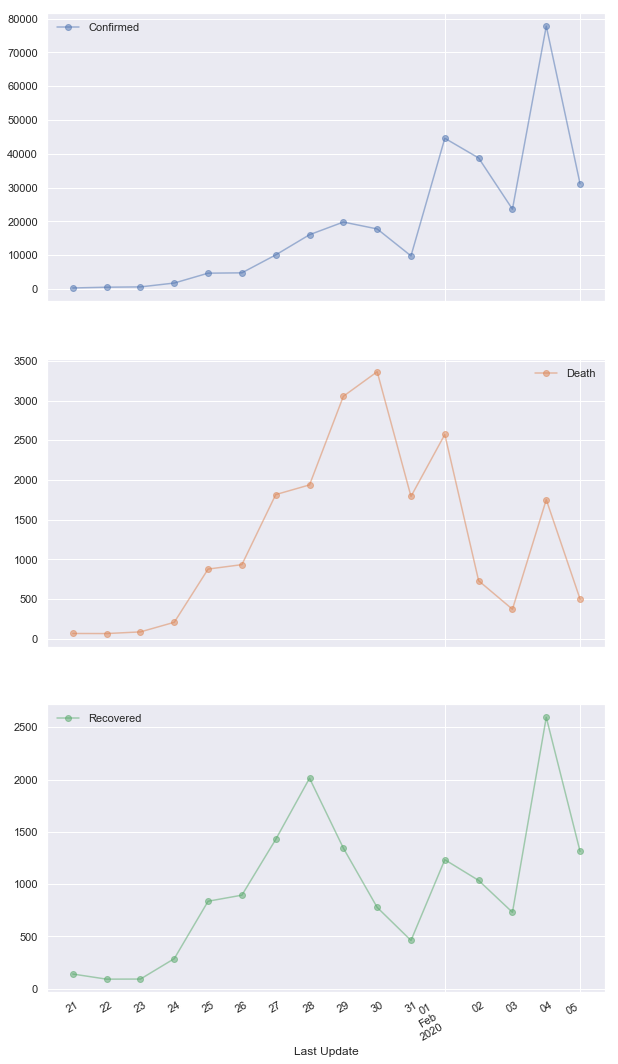

In [198]:
# China time series plot
print("CHINA TIME SERIES PLOT")
# Using the matplotlib plot function to plot time-series graph for the china dataset
plot_china = grouped_df[grouped_df['Country']=="China"][plott_attr].plot(marker='o', linestyle='-',alpha=0.5, figsize=(10, 20), subplots=True)

THAILAND TIME SERIES PLOT


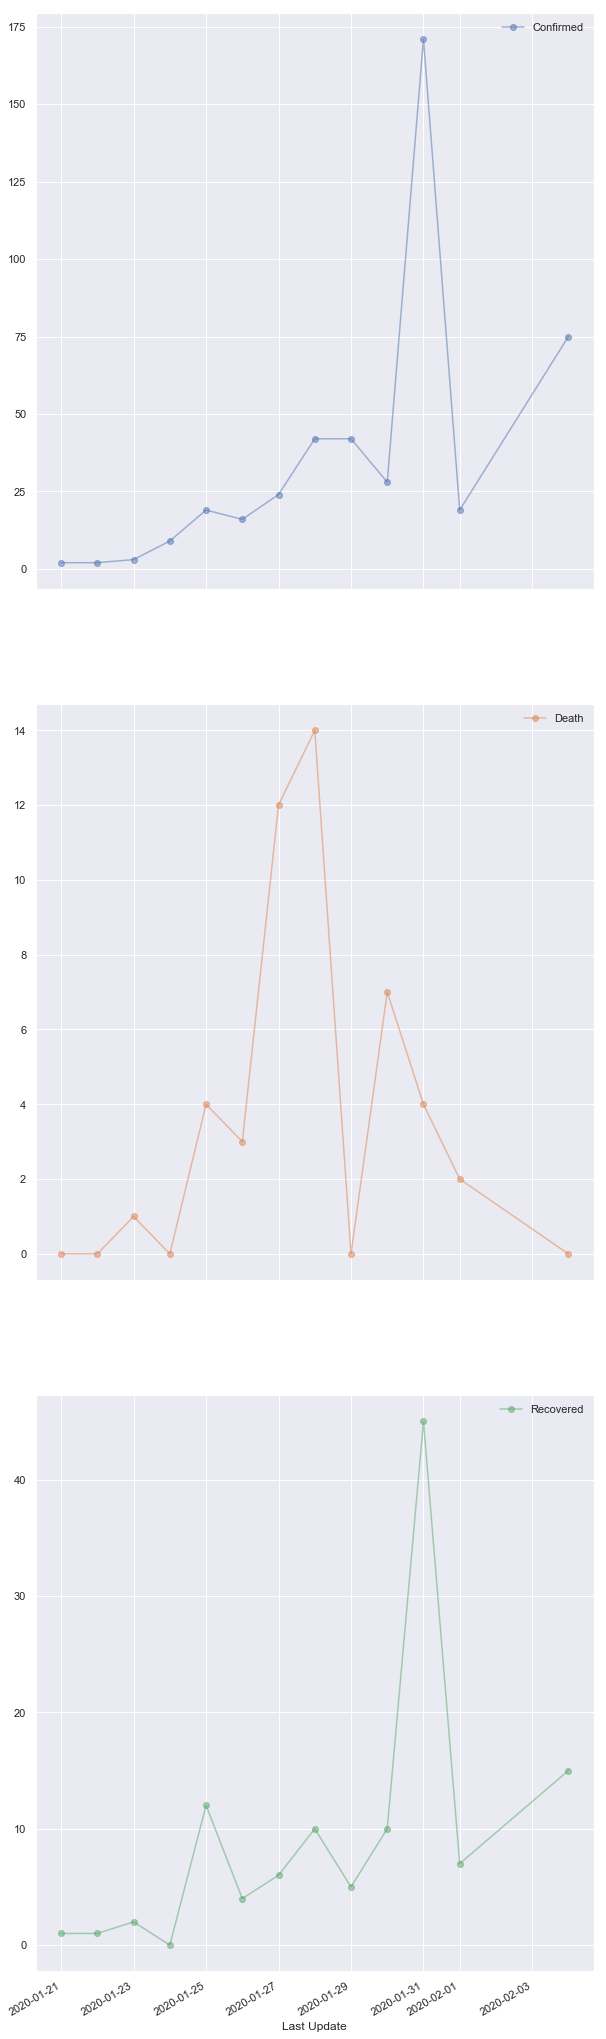

In [199]:
# Thailand time series plot
print('THAILAND TIME SERIES PLOT')
# Using the matplotlib plot function to plot time-series graph for the thailand dataset
plot_thailand = grouped_df[grouped_df['Country']=="Thailand"][plott_attr].plot(marker='o', linestyle='-',alpha=0.5, figsize=(10, 40), subplots=True)

JAPAN TIME SERIES PLOT


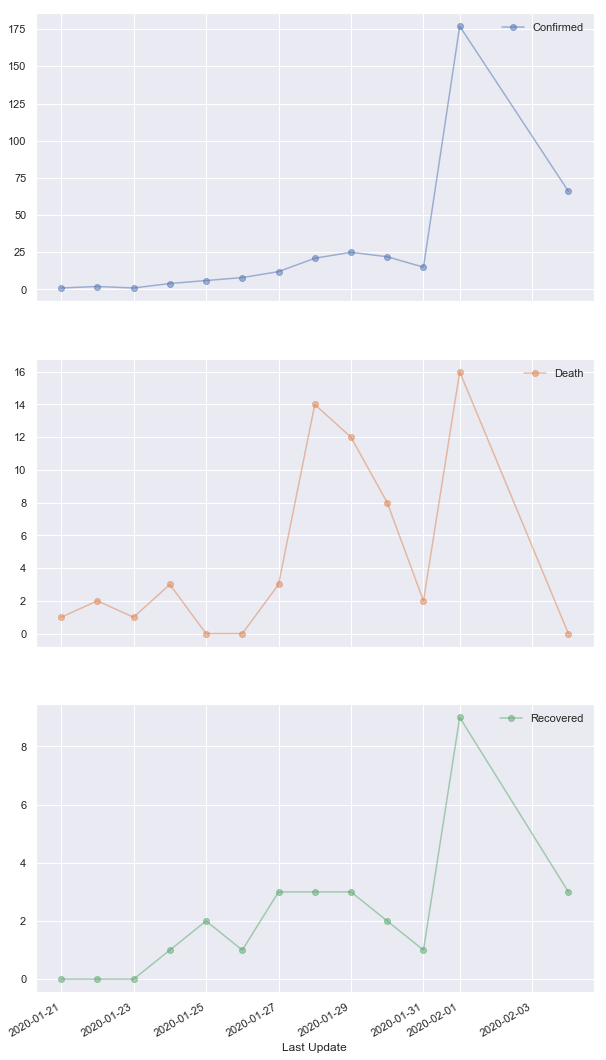

In [200]:
# Japan time series plot
print('JAPAN TIME SERIES PLOT')
# Using the matplotlib plot function to plot time-series graph for the japan dataset
plot_japan = grouped_df[grouped_df['Country']=="Japan"][plott_attr].plot(marker='o', linestyle='-',alpha=0.5, figsize=(10, 20), subplots=True)

SINGAPORE TIME SERIES PLOT


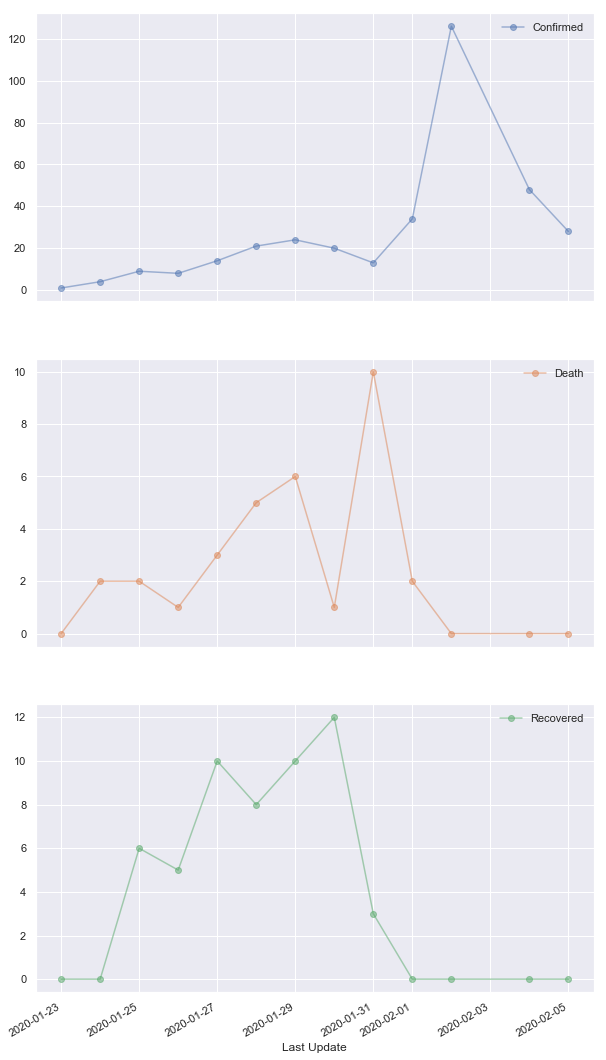

In [201]:
# Singapore time series plot
print('SINGAPORE TIME SERIES PLOT')
# Using the matplotlib plot function to plot time-series graph for the singapore dataset
plot_singapore = grouped_df[grouped_df['Country']=="Singapore"][plott_attr].plot(marker='o', linestyle='-',alpha=0.5, figsize=(10, 20), subplots=True)

HONG KONG TIME SERIES PLOT


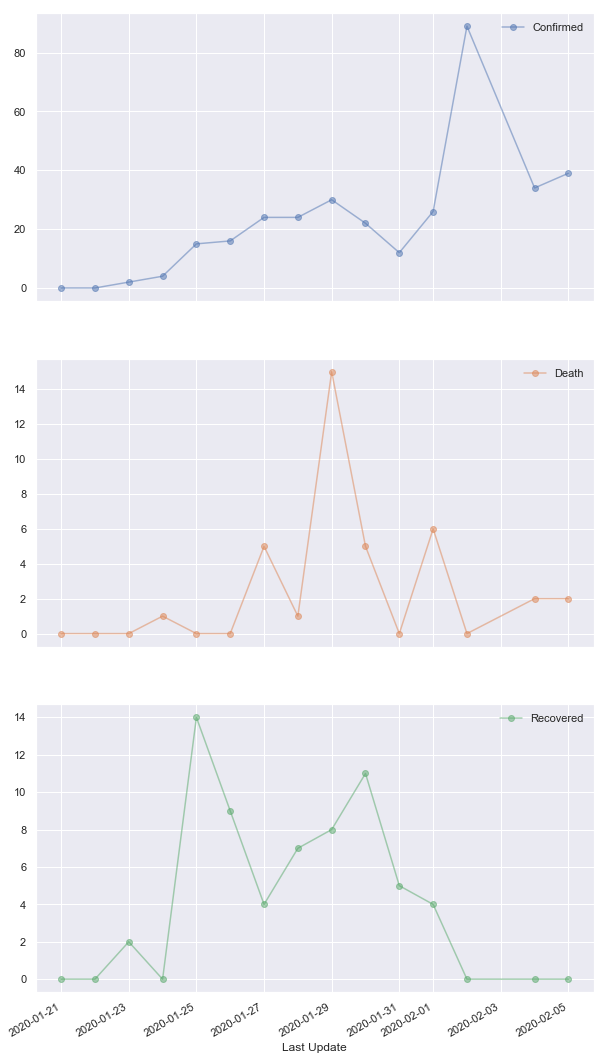

In [202]:
# Hong Kong time series plot
print('HONG KONG TIME SERIES PLOT')
# Using the matplotlib plot function to plot time-series graph for the hong kong dataset
plot_hk = grouped_df[grouped_df['Country']=="Hong Kong"][plott_attr].plot(marker='o', linestyle='-',alpha=0.5, figsize=(10, 20), subplots=True)

# END OF PRESENTATION
# THANK YOU
# ANY QUESTIONS ????